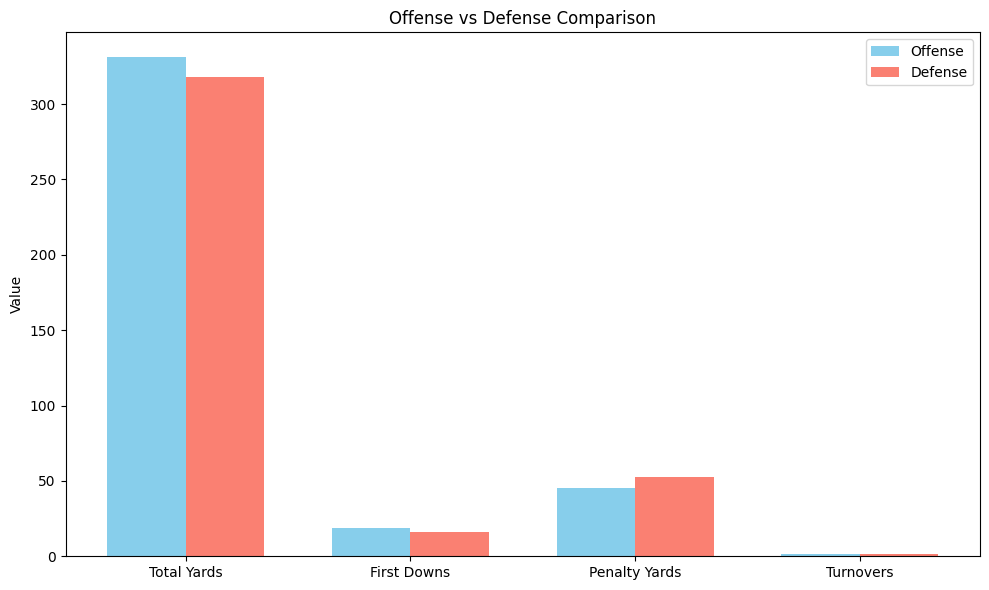

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("team_stats.csv")

# Convert numeric columns to float (ignore Difference row for this plot)
df_numeric = df[df['Split'].isin(['Offense', 'Defense'])].copy()
for col in df.columns[1:]:
    df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')

# Select metrics to compare
metrics = ['Yds_total', 'FirstD_total', 'Pen_yds', 'TO_total']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

x = range(len(metrics))
bar_width = 0.35

offense_vals = df_numeric[df_numeric['Split'] == 'Offense'][metrics].values[0]
defense_vals = df_numeric[df_numeric['Split'] == 'Defense'][metrics].values[0]

ax.bar([i - bar_width/2 for i in x], offense_vals, width=bar_width, label='Offense', color='skyblue')
ax.bar([i + bar_width/2 for i in x], defense_vals, width=bar_width, label='Defense', color='salmon')

# Labels and formatting
ax.set_xticks(x)
ax.set_xticklabels(['Total Yards', 'First Downs', 'Penalty Yards', 'Turnovers'])
ax.set_ylabel('Value')
ax.set_title('Offense vs Defense Comparison')
ax.legend()
plt.tight_layout()
plt.show()